<a href="https://colab.research.google.com/github/2303A52172/AIML_2303A52172/blob/main/AIML_LAB_08_2172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees - Classification

# 1 - Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

2 - Loading the data

In [ ]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [ ]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2,parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [ ]:
# Data description

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
# Getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type(car_data)

pandas.core.frame.DataFrame

# Before doing exploratory analysis, let's get the training and test data.

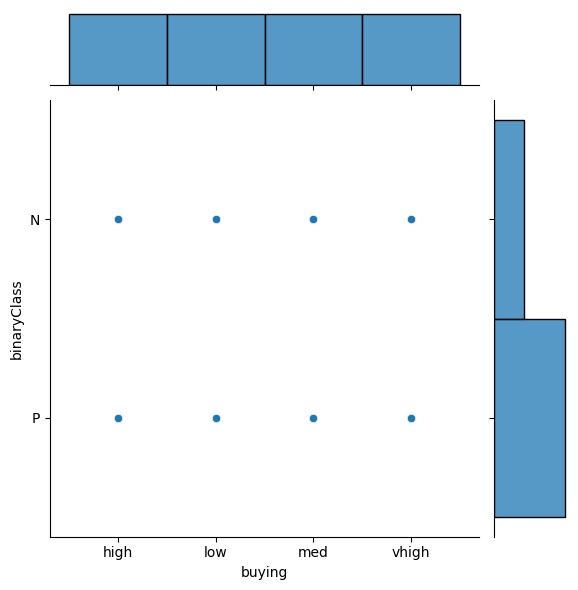

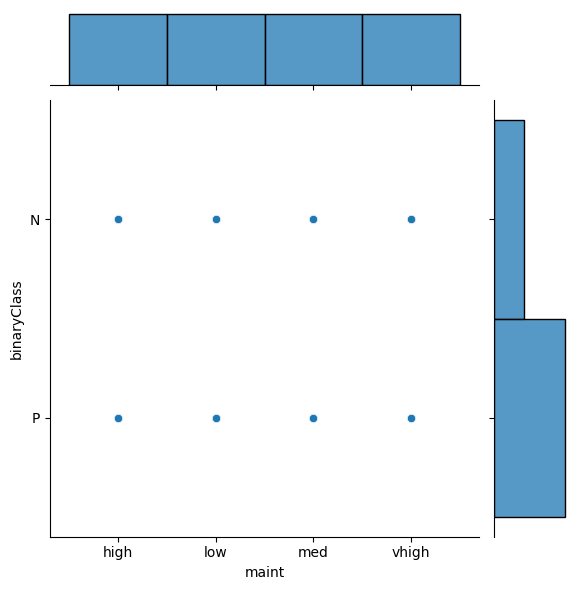

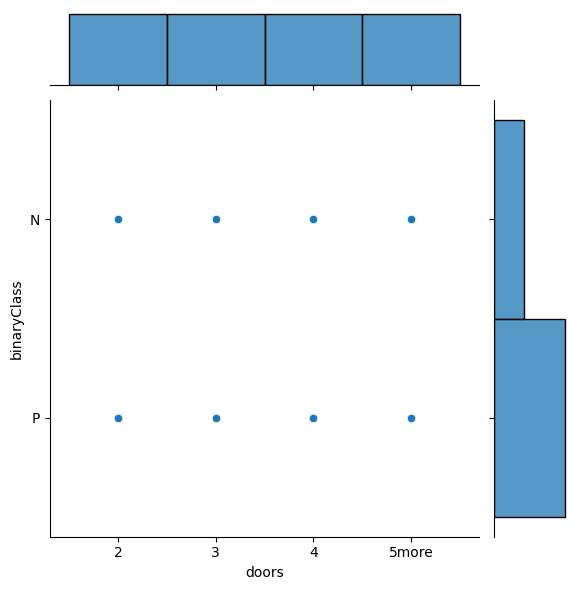

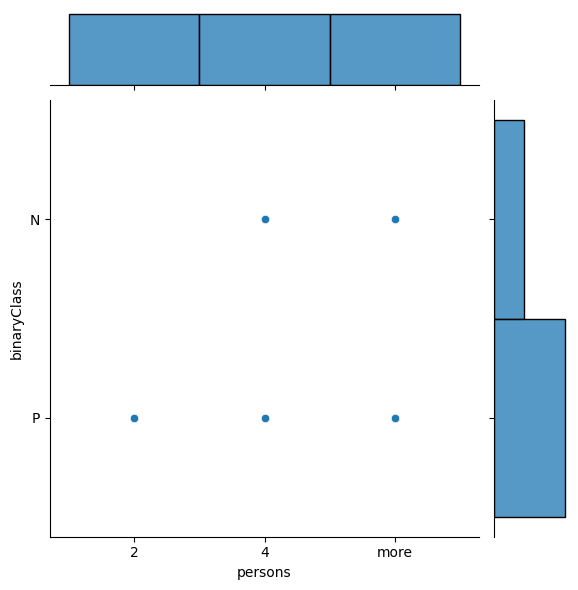

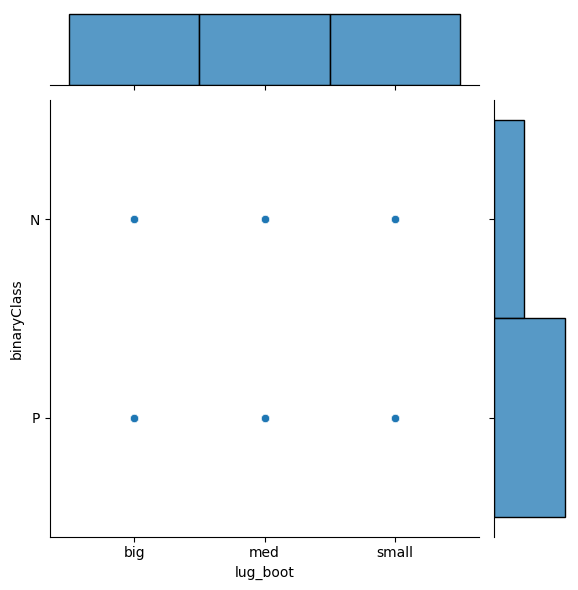

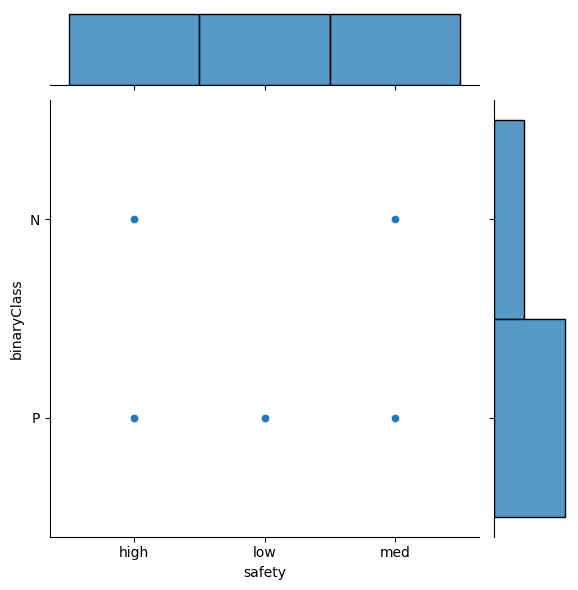

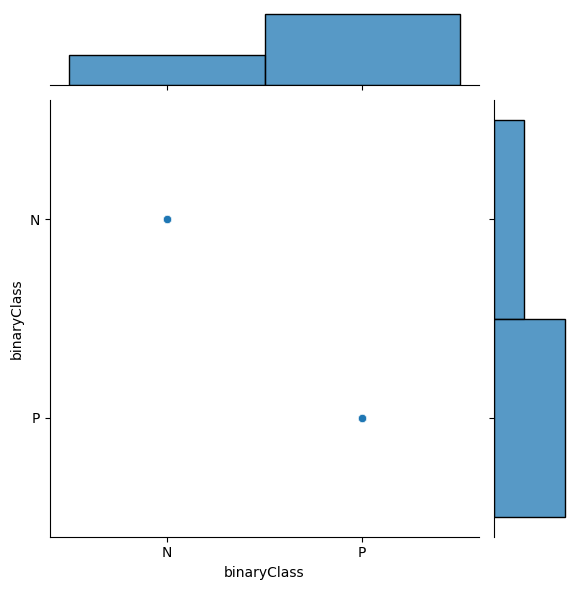

In [ ]:
#car_data.columns
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')

# Splitting Data into Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)

#print('Dataset size:{}\ntraining data is: {}\n
#testing data is: {}'.format(len(car_data),
#                            len(train_data),len(test_data)))
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

# Checking Summary Statistics

In [ ]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


# Checking Missing Values

In [ ]:
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


# We don't have any missing values.

# Checking Categorical Features

Let's inspect some categorical features that are in the
# dataset, almost all . Let's see that!

In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [ ]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [ ]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [ ]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [ ]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

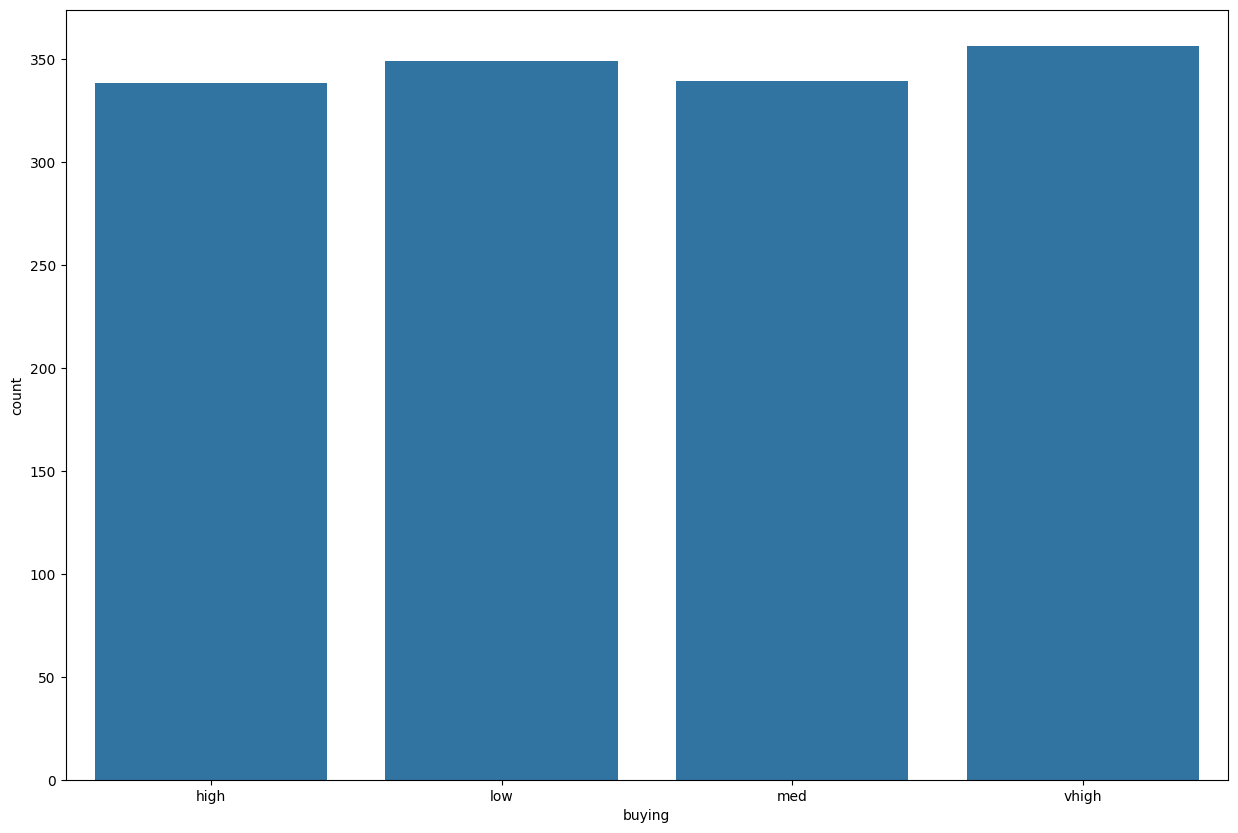

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

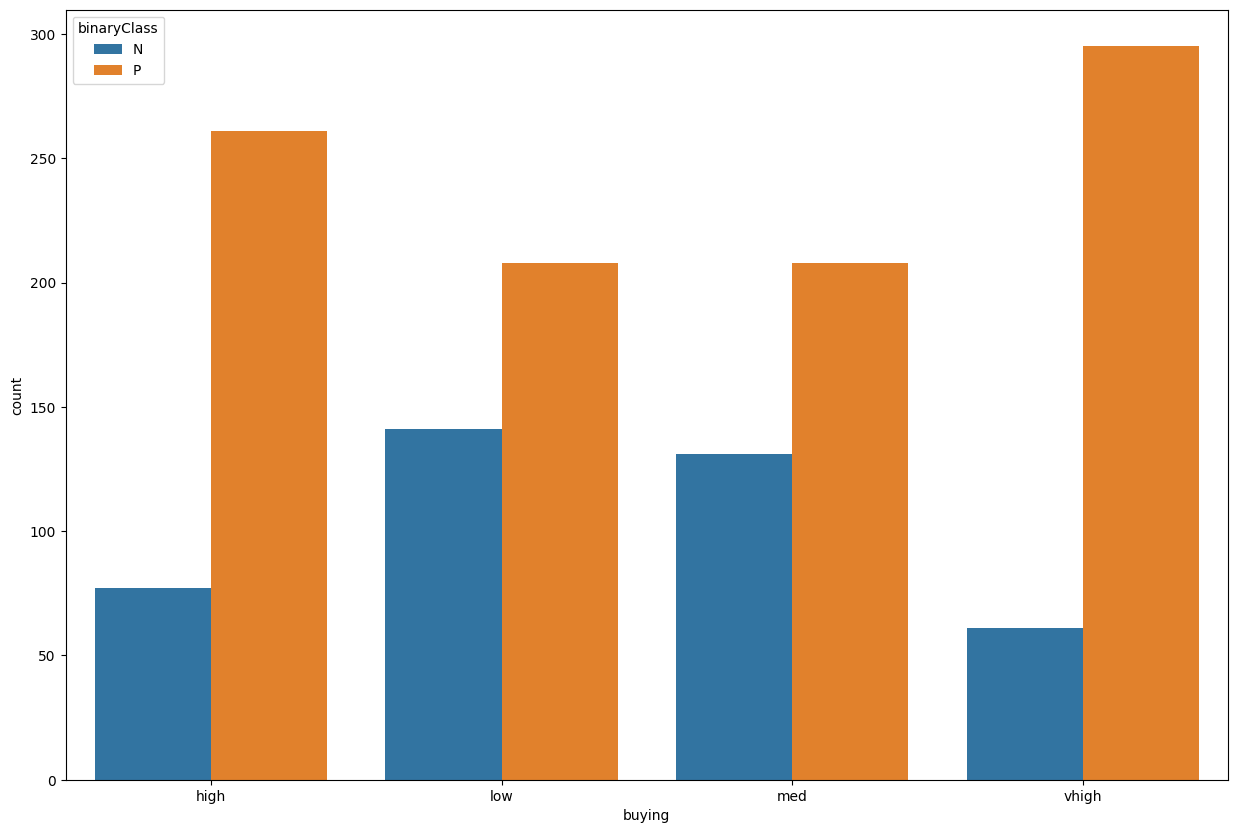

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

# As you can see above, the majority class in the buying price is median(med).

In [ ]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

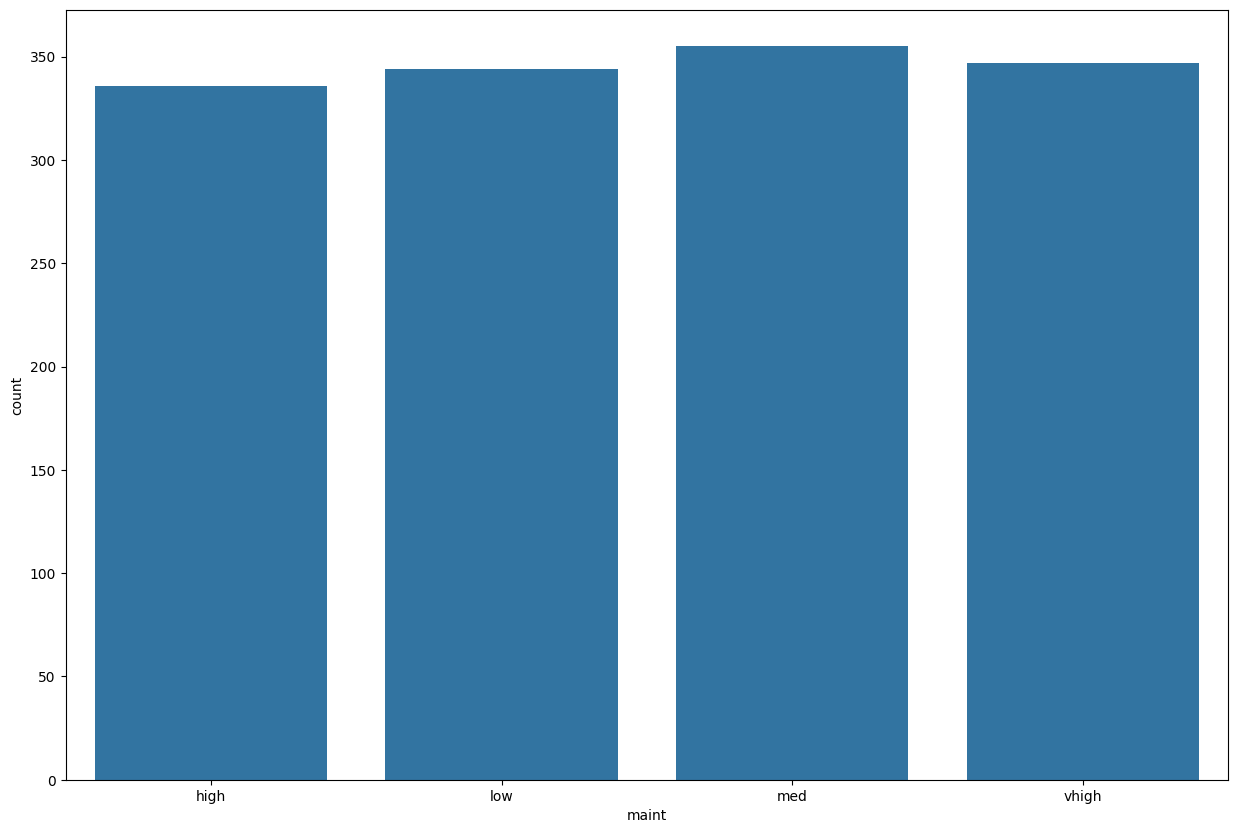

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

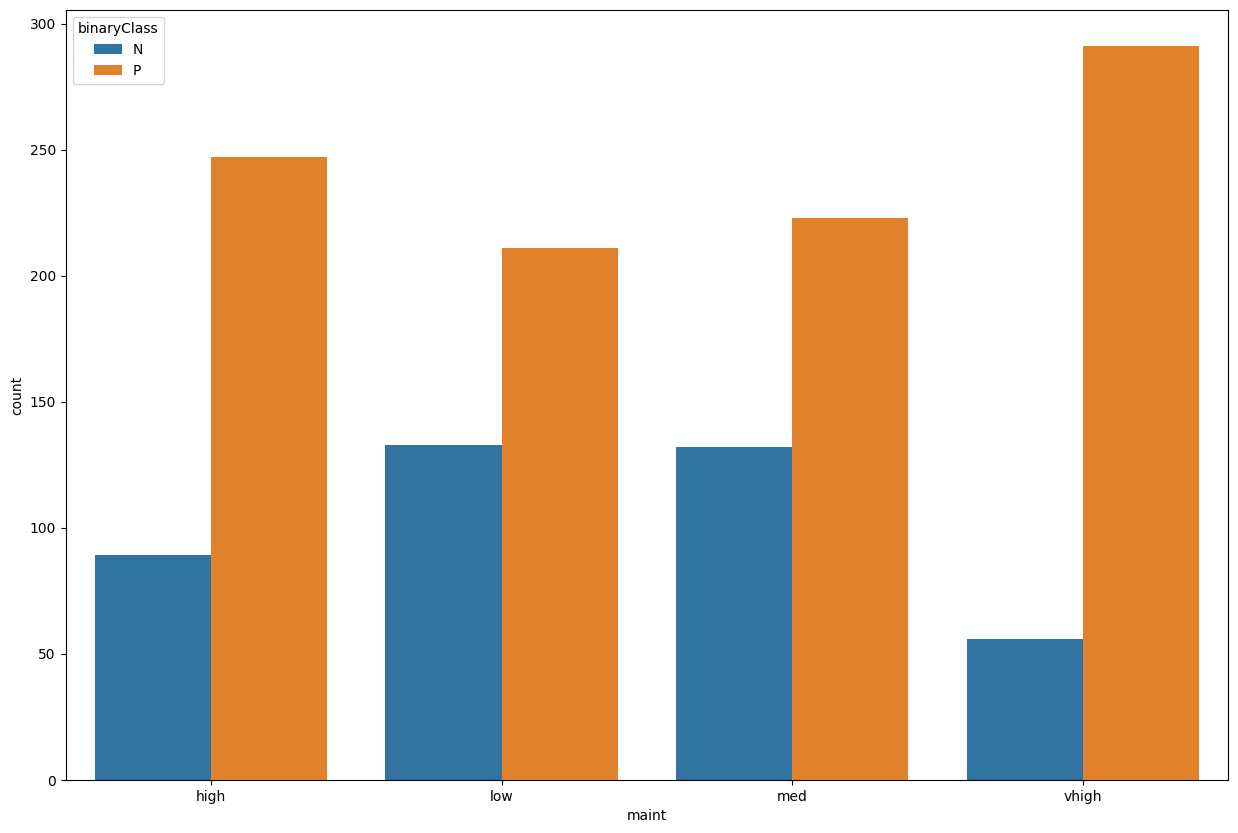

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

# Let's also check what's in doors.

In [ ]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

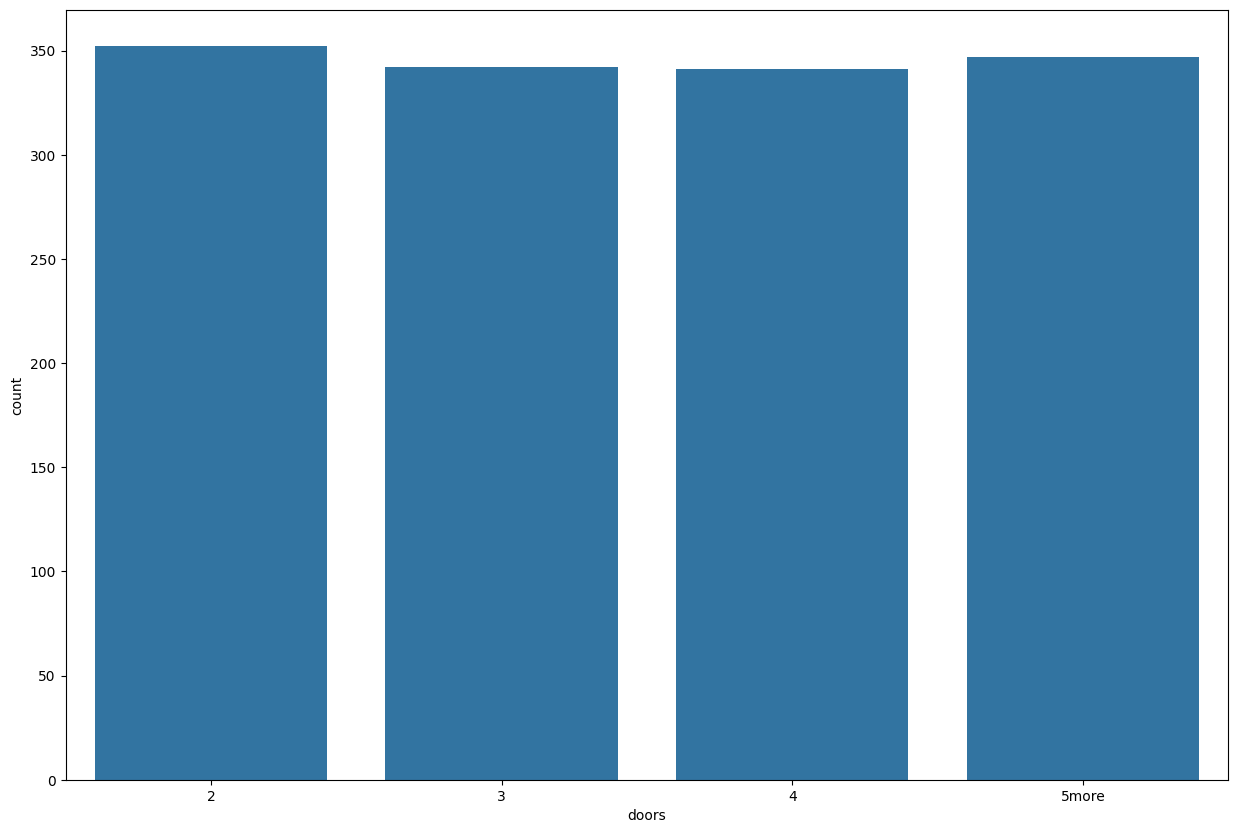

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

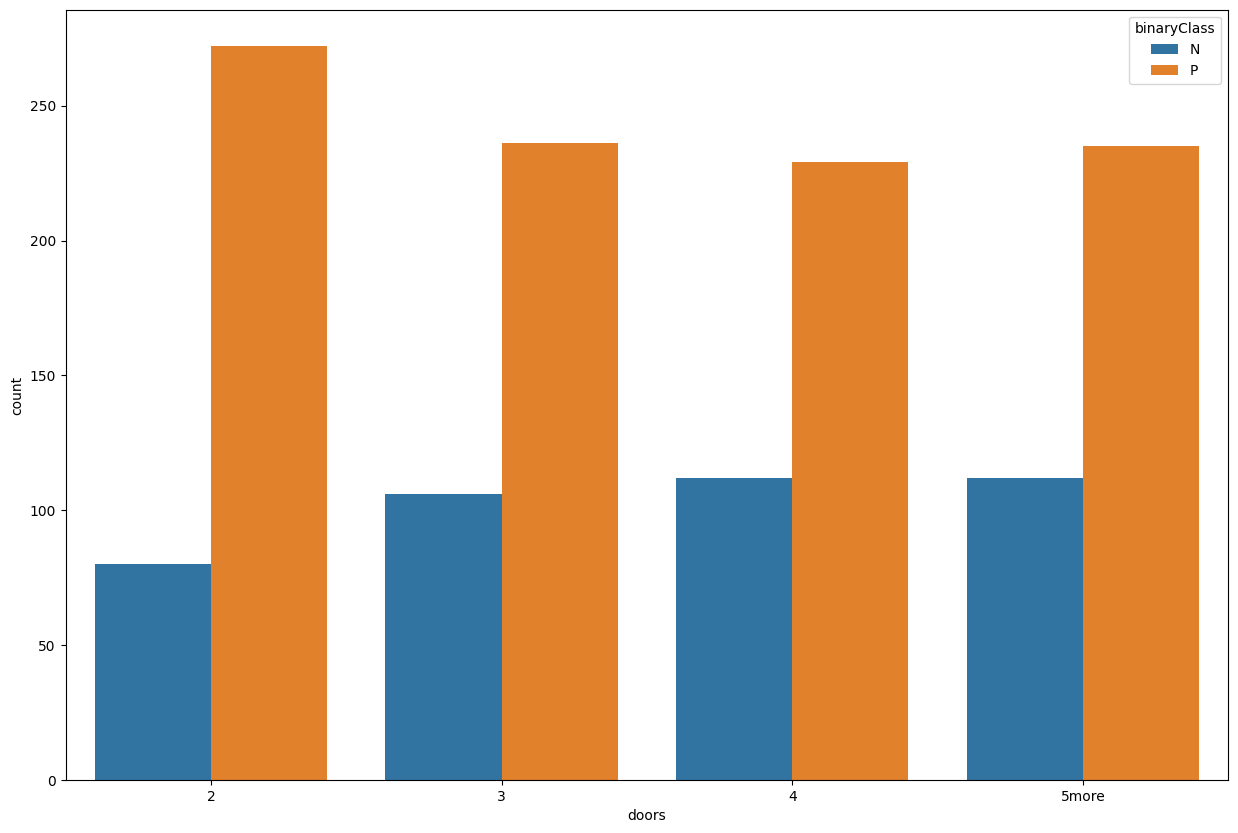

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

# Nothing stunning in the maintenance cost. All cars share the same maintenance costs.

In [ ]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='lug_boot', ylabel='count'>

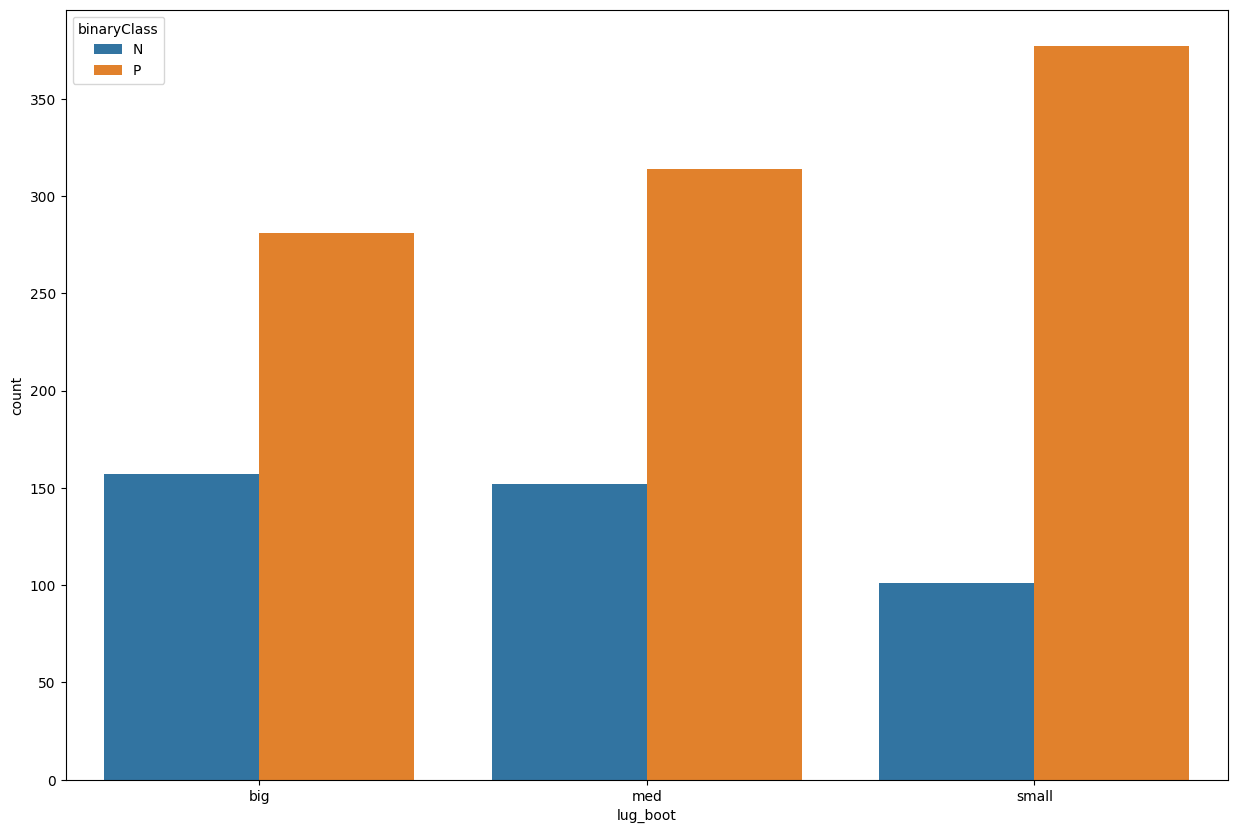

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [ ]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


<Axes: xlabel='safety', ylabel='count'>

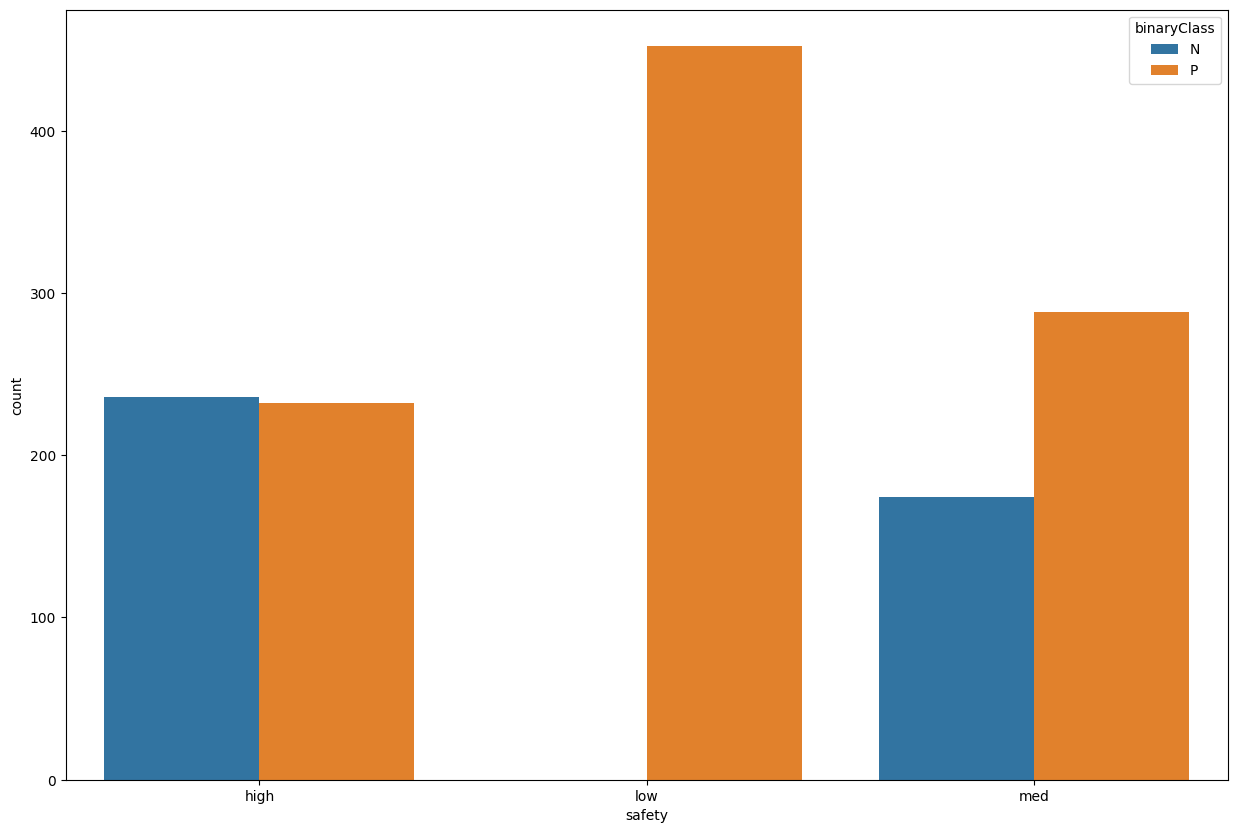

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

# 4 - Data Preprocessing

# Handling Categorical Features

In [ ]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

# Let's create a pipeline to encode all features in the training input data.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

Let's also handle labels. Labels contain P and N,
so we want to convert those into numbers. Here instead of using Ordinary Encoder,
# we will use Label Encoder. Sklearn is explicity that it is used to encode target features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

# 5 - Training Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
# On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

# Let's train the same model on the scaled data.

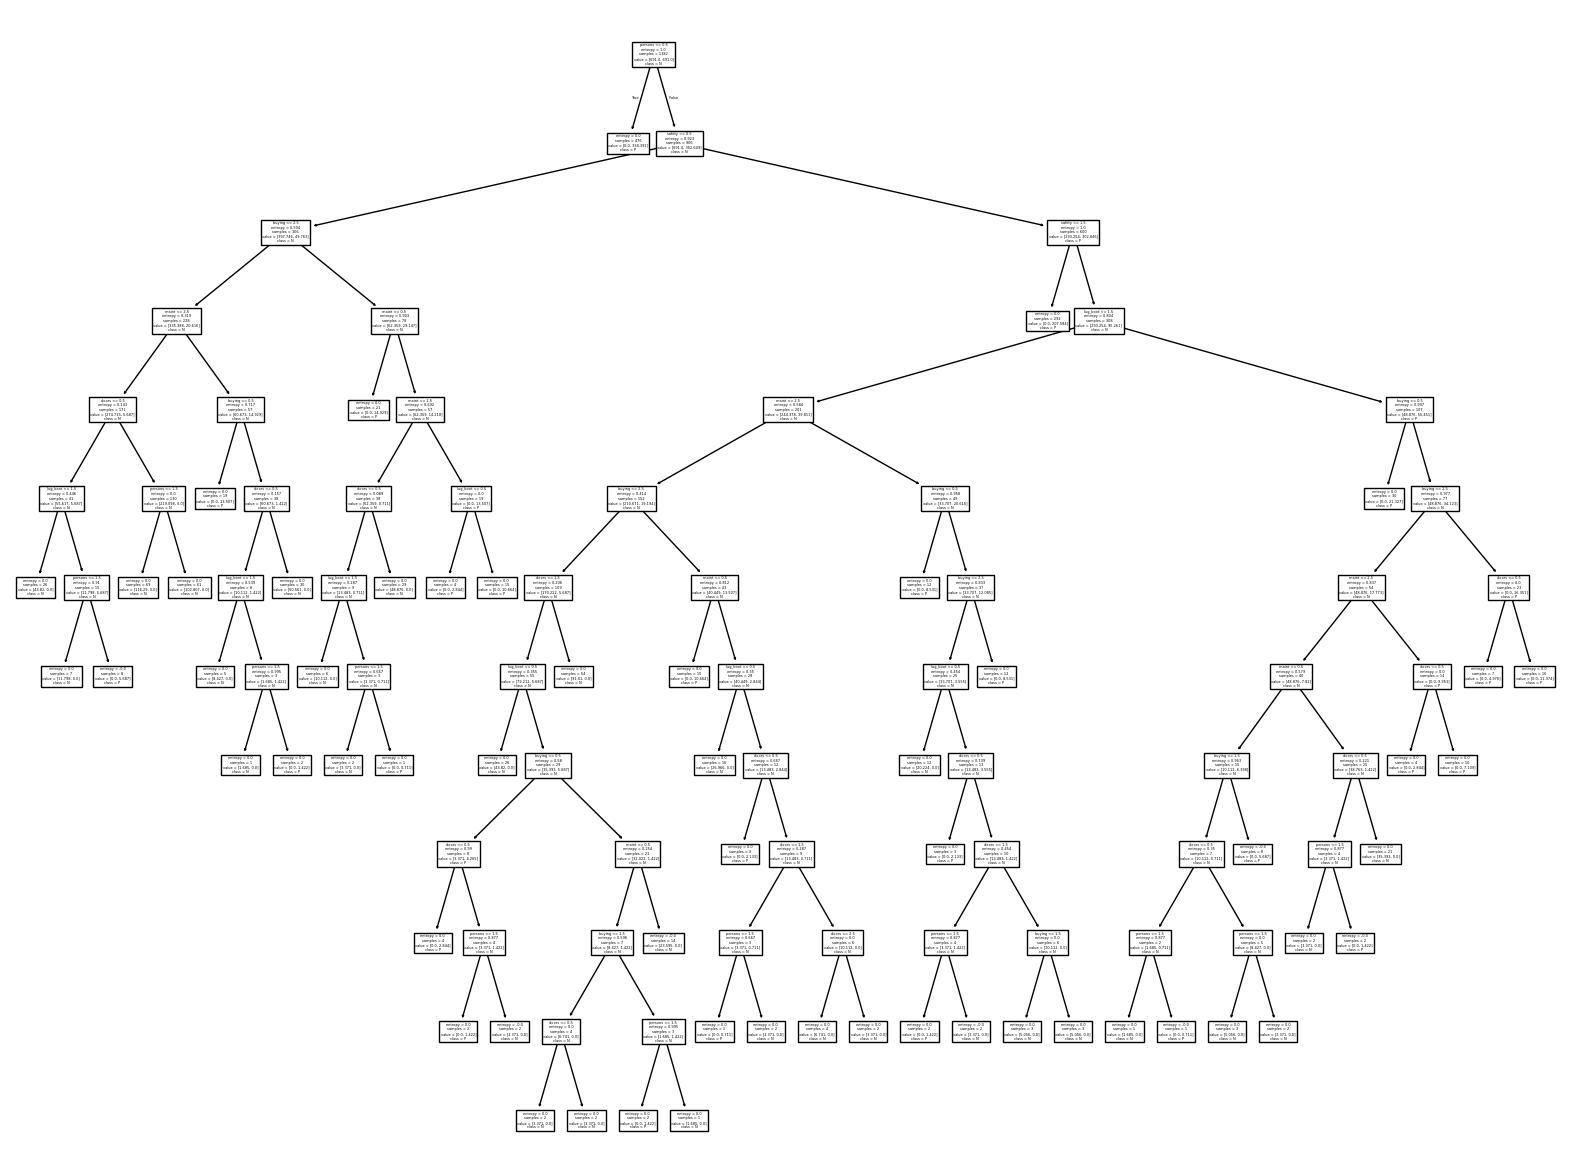

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);

In [ ]:
# if you run this, it will be error.
# SKlearn tree implementation doesn't support categorical features

#from sklearn.tree import DecisionTreeClassifier

#tree_clf = DecisionTreeClassifier()

#tree_clf.fit(car_train, car_labels)

# 6 - Evaluating Decision Trees

Let's build 3 functions to display accuracy, confusion matrix,
and classification report. Classification report contains all
# useful metrics such as precision, recall, and f1 score.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [ ]:
accuracy_score(car_labels_prepared,preds)

1.0

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

One way to avoid overfitting is reduce number maximum depth of the tree, set by the hyperparameter max_depth. Similarly, we can attempt to reduce all hyperparameters with maxterm while also increasing the min_ term parameters.
# New Section

Also, I set the class_weight to balanced because our dataset is imbalanced. By setting it to balanced, the model will automatically adjust the class weight based on the number of available samples in all classes.

Let's use GridSearch to find best values of these hyperparameters.

In [ ]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [ ]:
tree_best = grid_search.best_estimator_

# We can also plot the tree of the improved model.

In [ ]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

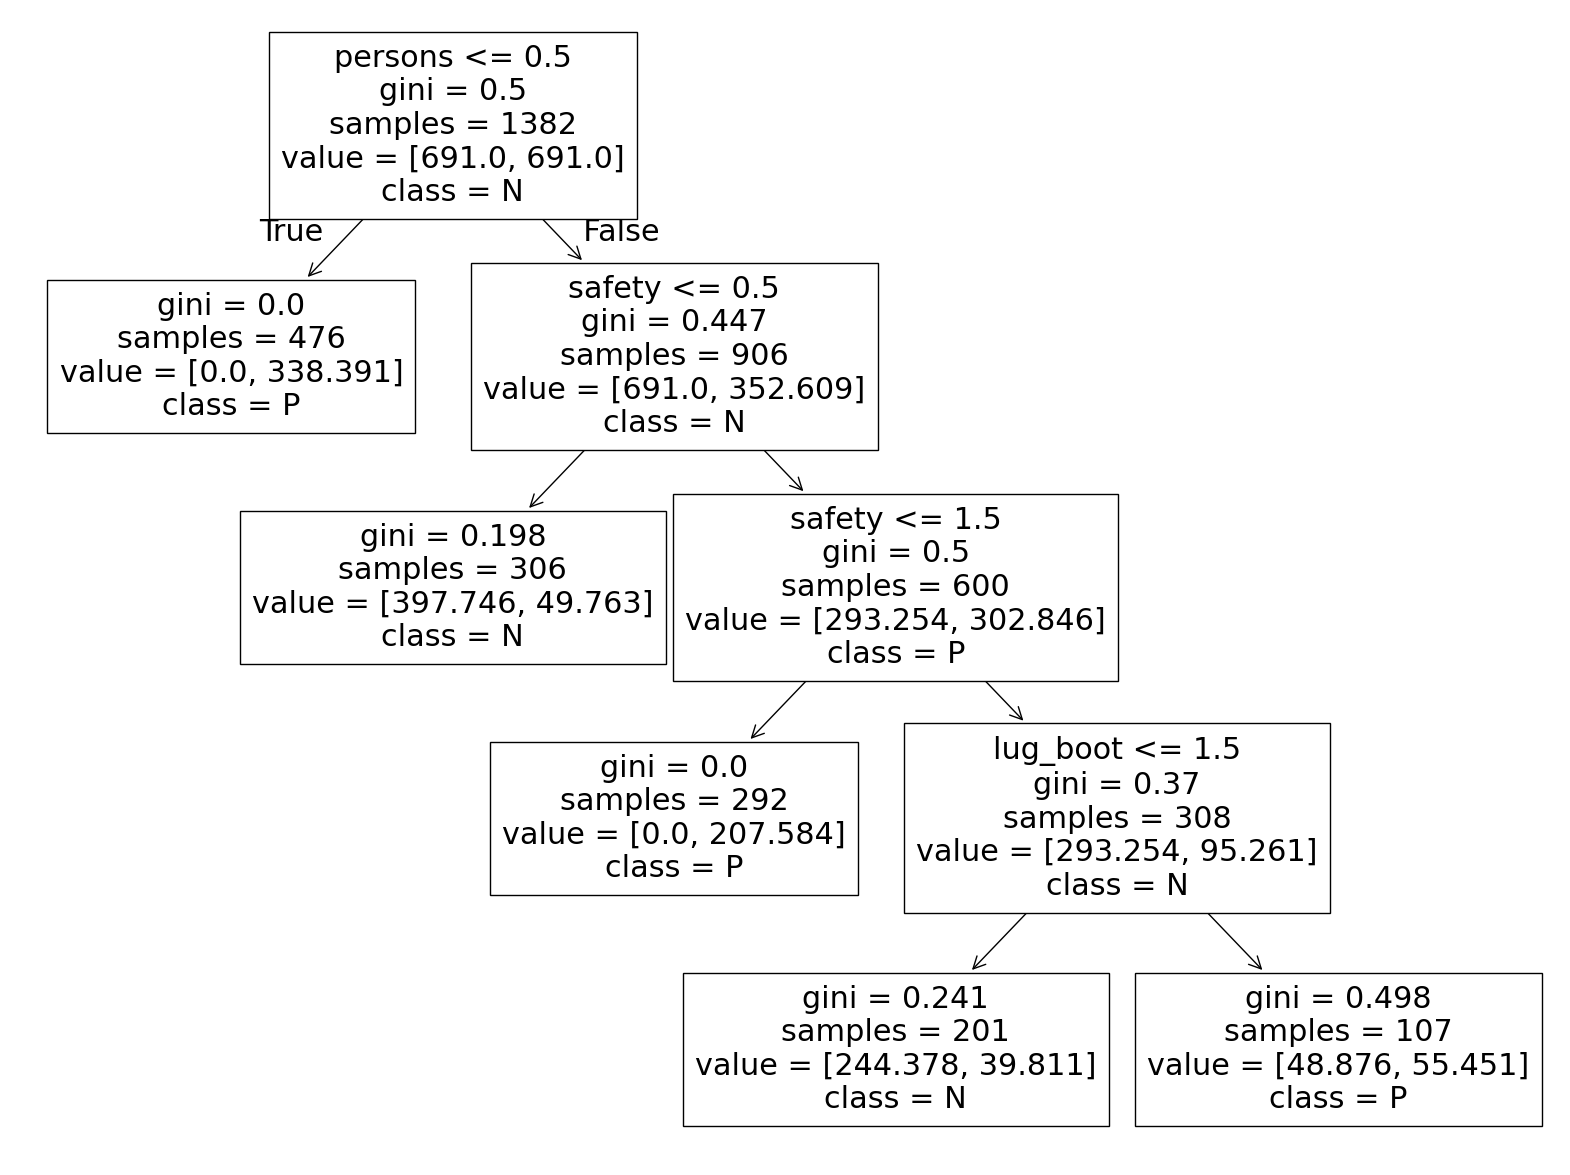

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

# Let's make prediction on the training data again.

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(X, model, y_true):
    """
    Calculates the accuracy of a model's predictions.

    Args:
        X: The input features.
        model: The trained model.
        y_true: The true target values.

    Returns:
        The accuracy score.
    """


In [ ]:
from sklearn.metrics import confusion_matrix

def accuracy(X, model, y_true):
    """
    Calculates the accuracy of a model's predictions.

    Args:
        X: The input features.
        model: The trained model.
        y_true: The true target values.

    Returns:
        The accuracy score.
    """
    # Assuming 'model' has a 'predict' method
    y_pred = model.predict(X)
    return accuracy_score(y_true, y_pred)


def conf_matrix(X, model, y_true):
    """
    Calculates and displays the confusion matrix.

    Args:
        X: The input features.
        model: The trained model.
        y_true: The true target values.

    Returns:
        None (Displays the confusion matrix)
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    # Optionally, you can use a library like seaborn or matplotlib to visualize the matrix
    # import seaborn as sns
    # sns.heatmap(cm, annot=True, fmt="d")

In confusion matrix, each row represent an actual class and each column represents predicted class.

So, from the results above:

430 negative examples(N) were correcty predicted as negatives(true negatives).
28 negatives examples(N) were incorrectly classified as positive examples when they are in fact negatives(false positives).
139 positive examples were incorrectly classified as negative(N) when in fact they are positives(P) (false negatives).
958 were correctly classified as positive examples(true positives).

In [ ]:
from sklearn.metrics import classification_report

# Assuming car_train_prepared, tree_best, and car_labels_prepared are defined
report = classification_report(car_labels_prepared, tree_best.predict(car_train_prepared))
print(report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



Wow, this is much better. By only setting the class weight to balanced and finding the best values of the hyperparameters, we were able to improve our model.

If you remember, the negative class has fewer examples than the positive classes. You can see them in support in classification report. But our model is able to identify them correctly at 76%, and also is able to identify the positive examples at 97% without overfitting. That is precision.

A few notes about Precison/Recall/F1 score:

Precision is the model accuracy on predicting positive examples correctly.

Recall is the ratio of the positive examples that are correctly identified by the model.

F1 score is the harmonic mean of precision and recall.

The higher the precision and recall are, the higher the F1 score. But there is a tradeoff between them. Increasing precision will reduce recall, and vice versa. So it's fair to say that it depends on the problem you're trying to solve and the metrics you want to optimize for.

Evaluating the model on the test set

It is only after we have improved the model that we can feed it to the test set. If we try to show the test set to the model while we are still training, we may cause a potential leak thus producing misleading predictions.

Also, we will apply the same processing functions that we applied to the training set.

In [ ]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [ ]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

Now we can make predictions on the test set. We will only have to call the metrics functions we created previously.

In [ ]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

# Assuming 'car_test_labels' contains your test labels and
# requires the same preprocessing as 'car_test',
# apply the same transformation (if needed)
# If no transformation is needed